In [27]:
from ultralytics import YOLO
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr

%matplotlib inline

model = YOLO("best.pt")
reader = easyocr.Reader(['en'], gpu=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [21]:
# from PIL
im1 = Image.open("../Donut/deployment/0.jpg")
results = model.predict(source=im1, save=True)  # save plotted images

# from list of PIL/ndarray
results = model.predict(source=[im1], classes=[1, 3])

Ultralytics YOLOv8.0.49  Python-3.7.13 torch-1.12.1+cu116 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs

0: 512x800 1 address, 1 date_of_birth, 1 license_number, 1 name, 1 sex, 30.1ms
Speed: 0.0ms preprocess, 30.1ms inference, 3.2ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs\detect\predict

0: 512x800 1 date_of_birth, 1 name, 30.2ms
Speed: 0.0ms preprocess, 30.2ms inference, 2.7ms postprocess per image at shape (1, 3, 800, 800)


tensor([3.], device='cuda:0') tensor([[169.,  82., 281., 118.]], device='cuda:0')


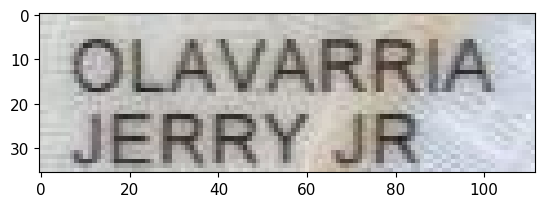

['OLAVARRIA', 'JERRY JR']
tensor([1.], device='cuda:0') tensor([[168., 203., 292., 222.]], device='cuda:0')


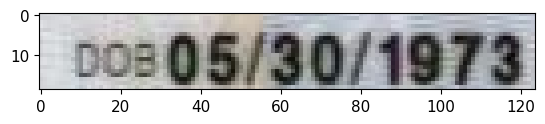

['Do3i', '05/30/1973']


In [31]:
boxes = results[0].boxes
for box in boxes:
    print(box.cls, box.xyxy)

    # crop each box 
    x1, y1, x2, y2 = box.xyxy[0].tolist()
    cropped = im1.crop((x1, y1, x2, y2))

    plt.imshow(cropped)
    plt.show()

    print(reader.readtext(np.array(cropped), detail=0))